In [181]:
# Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier



warnings.filterwarnings('ignore')

# Set up for inline plotting
%matplotlib inline

In [182]:
# reading data
train_data = pd.read_csv('C:\\Users\\Ritik\\Downloads\\ML project\\training_data.csv')
train_labels = pd.read_csv('C:\\Users\\Ritik\\Downloads\\ML project\\training_data_targets.csv', header=None)
test_data = pd.read_csv('C:\\Users\\Ritik\\Downloads\\ML project\\test_data.csv')
# Shape of data
print("Shape of train data: ", train_data.shape)
print("Shape of labels: ", train_labels.shape)
print("shape of test data:" , test_data.shape)
# # head of data
print("Head of train data: ", train_data.head())
print("Head of labels: ", train_labels.head())



Shape of train data:  (775, 24)
Shape of labels:  (775, 1)
shape of test data: (87, 24)
Head of train data:     Gender   Age_at_diagnosis        Primary_Diagnosis   Race         IDH1  \
0  Female  36 years 302 days             Glioblastoma  white  NOT_MUTATED   
1  Female   25 years 78 days             Mixed glioma  white      MUTATED   
2    Male  62 years 222 days             Glioblastoma  white  NOT_MUTATED   
3  Female   69 years 60 days             Mixed glioma  white      MUTATED   
4  Female  43 years 161 days  Astrocytoma, anaplastic  white      MUTATED   

          TP53         ATRX         PTEN         EGFR          CIC  ...  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  ...   
1      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  ...   
3      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
4      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED

In [183]:
# Basic info
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             775 non-null    object
 1   Age_at_diagnosis   775 non-null    object
 2   Primary_Diagnosis  775 non-null    object
 3   Race               775 non-null    object
 4   IDH1               775 non-null    object
 5   TP53               775 non-null    object
 6   ATRX               775 non-null    object
 7   PTEN               775 non-null    object
 8   EGFR               775 non-null    object
 9   CIC                775 non-null    object
 10  MUC16              775 non-null    object
 11  PIK3CA             775 non-null    object
 12  NF1                775 non-null    object
 13  PIK3R1             775 non-null    object
 14  FUBP1              775 non-null    object
 15  RB1                775 non-null    object
 16  NOTCH1             775 non-null    object
 1

In [184]:
def age_to_years(age_data):
    # Check if the data is already in numeric form (int or float)
    if isinstance(age_data, int) or isinstance(age_data, float):
        return age_data

    # If the data is a string, process it
    if isinstance(age_data, str):
        parts = age_data.split()

        # Initialize years and days to 0
        years, days = 0, 0

        # Check the format and extract years and days
        if len(parts) == 4:  # Format is "X years Y days"
            years = int(parts[0])
            days = int(parts[2])
        elif len(parts) == 2:  # Format is either "X years" or "Y days"
            if 'years' in parts[1]:
                years = int(parts[0])
            else:
                days = int(parts[0])

        # Convert to total days and then to years
        total_days = years * 365 + days
        return round(total_days / 365.25)

    # If the data is neither string nor numeric, return None or handle as needed
    return None

# Apply the conversion function to the 'Age_at_diagnosis' column
train_data['Age_at_diagnosis'] = train_data['Age_at_diagnosis'].apply(age_to_years)


In [185]:
# Assuming you've already defined and applied the age_to_years function

# Display the first few rows to verify the transformation
print(train_data['Age_at_diagnosis'].head())

# Check the data type and summary statistics of the transformed column
print(train_data['Age_at_diagnosis'].dtype)
print(train_data['Age_at_diagnosis'].describe())

# Optional: Compare with original data if you have it stored in another variable or DataFrame


0    37
1    25
2    63
3    69
4    43
Name: Age_at_diagnosis, dtype: int64
int64
count    775.000000
mean      50.459355
std       16.259383
min        0.000000
25%       37.000000
50%       51.000000
75%       63.000000
max       89.000000
Name: Age_at_diagnosis, dtype: float64


In [186]:
# checking for null values
print("null values in train", train_data.isnull().sum())
print("null values in labels", train_labels.isnull().sum())
print("duplicate values in train", train_data.duplicated().sum())


# print all data types 
print(train_data.dtypes)

null values in train Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64
null values in labels 0    0
dtype: int64
duplicate values in train 32
Gender               object
Age_at_diagnosis      int64
Primary_Diagnosis    object
Race                 object
IDH1                 object
TP53                 object
ATRX                 object
PTEN                 object
EGFR                 object
CIC                  object
MUC16                object
PIK3CA               object
NF1    

In [187]:
# 'MUTATED' and 'NOT_MUTATED' are replaced with 1 and 0, respectively.
label_mapping_genes = {
    'MUTATED': 1,
    'NOT_MUTATED': 0}
columns_to_relabel = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA','MUC16','PIK3CA','NF1','PIK3R1']

label_mapping_diagnosis = {
    'Glioblastoma':1,
    'Mixed glioma':2,
    'Astrocytoma, anaplastic':3, 
    'Oligodendroglioma, NOS':4,
    'Oligodendroglioma, anaplastic':5,
    'Astrocytoma, NOS':6,
    '--':7}

label_mapping_race = {
    'white':1,
    'black or african american':2,
    'not reported':3,
    'asian':4,
    '--':5,
    'american indian or alaska native':6}

label_mapping_gender = {
    'Male':1,
    'Female':2}

train_data[columns_to_relabel] = train_data[columns_to_relabel].replace(label_mapping_genes)
train_data['Primary_Diagnosis'] = train_data['Primary_Diagnosis'].replace(label_mapping_diagnosis)
train_data['Race']=train_data['Race'].replace(label_mapping_race)
train_data['Gender']=train_data['Gender'].replace(label_mapping_gender)

#------------------------------------------------#
# Dropping the column 'Age_at_diagnosis' as it has string values and cannot be directly used for training
# It can be converted to integer values and used for training. 
# train_data.drop('Age_at_diagnosis', axis=1, inplace=True)
#------------------------------------------------#


# rename the column name to "label"
train_labels.rename(columns={'GBM': 'label'}, inplace=True)
print(train_labels.columns)

label_mapping = {
    'GBM': 1,
    'LGG': 0}
train_labels['label'] = train_labels[0].replace(label_mapping)

print(train_labels.head())
print(train_labels['label'].value_counts())


Index([0], dtype='int64')
     0  label
0  GBM      1
1  LGG      0
2  GBM      1
3  LGG      0
4  LGG      0
label
0    449
1    326
Name: count, dtype: int64


In [188]:
X_train = train_data

#-------------------------------------------------------------------------------------#
X_train = X_train.replace('--', 0) # Replacing all -- with 0 in the full dataset. 
#-------------------------------------------------------------------------------------#
print(X_train.describe())
X_train2 =X_train
y_train2 = train_labels['label']
print(X_train2.head)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train2, y_train2, test_size=0.2, random_state=22)


           Gender  Age_at_diagnosis  Primary_Diagnosis        Race  \
count  775.000000        775.000000         775.000000  775.000000   
mean     1.423226         50.459355           2.538065    1.192258   
std      0.504735         16.259383           1.669233    0.629131   
min      0.000000          0.000000           1.000000    1.000000   
25%      1.000000         37.000000           1.000000    1.000000   
50%      1.000000         51.000000           2.000000    1.000000   
75%      2.000000         63.000000           4.000000    1.000000   
max      2.000000         89.000000           7.000000    6.000000   

             IDH1        TP53        ATRX        PTEN        EGFR         CIC  \
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000   
mean     0.477419    0.407742    0.261935    0.170323    0.130323    0.127742   
std      0.499812    0.491732    0.439972    0.376159    0.336875    0.334018   
min      0.000000    0.000000    0.000000    

Feature Importances:
Gender               0.007470
Age_at_diagnosis     0.061838
Primary_Diagnosis    0.434575
Race                 0.012925
IDH1                 0.276537
TP53                 0.012628
ATRX                 0.034000
PTEN                 0.041056
EGFR                 0.015321
CIC                  0.029362
MUC16                0.006312
PIK3CA               0.004659
NF1                  0.005695
PIK3R1               0.007689
FUBP1                0.006566
RB1                  0.008981
NOTCH1               0.009578
BCOR                 0.003069
CSMD3                0.001268
SMARCA4              0.002603
GRIN2A               0.001566
IDH2                 0.011985
FAT4                 0.002019
PDGFRA               0.002298
dtype: float64


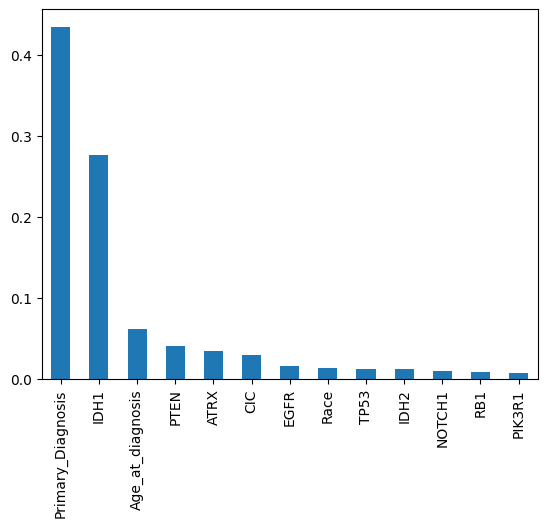

In [189]:
from sklearn.ensemble import ExtraTreesClassifier

# Feature importance analysis
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print("Feature Importances:")
print(feature_importances)
feature_importances.nlargest(13).plot.bar()
plt.show()

In [190]:
temp = X_train2
temp['label'] = y_train2

<Axes: >

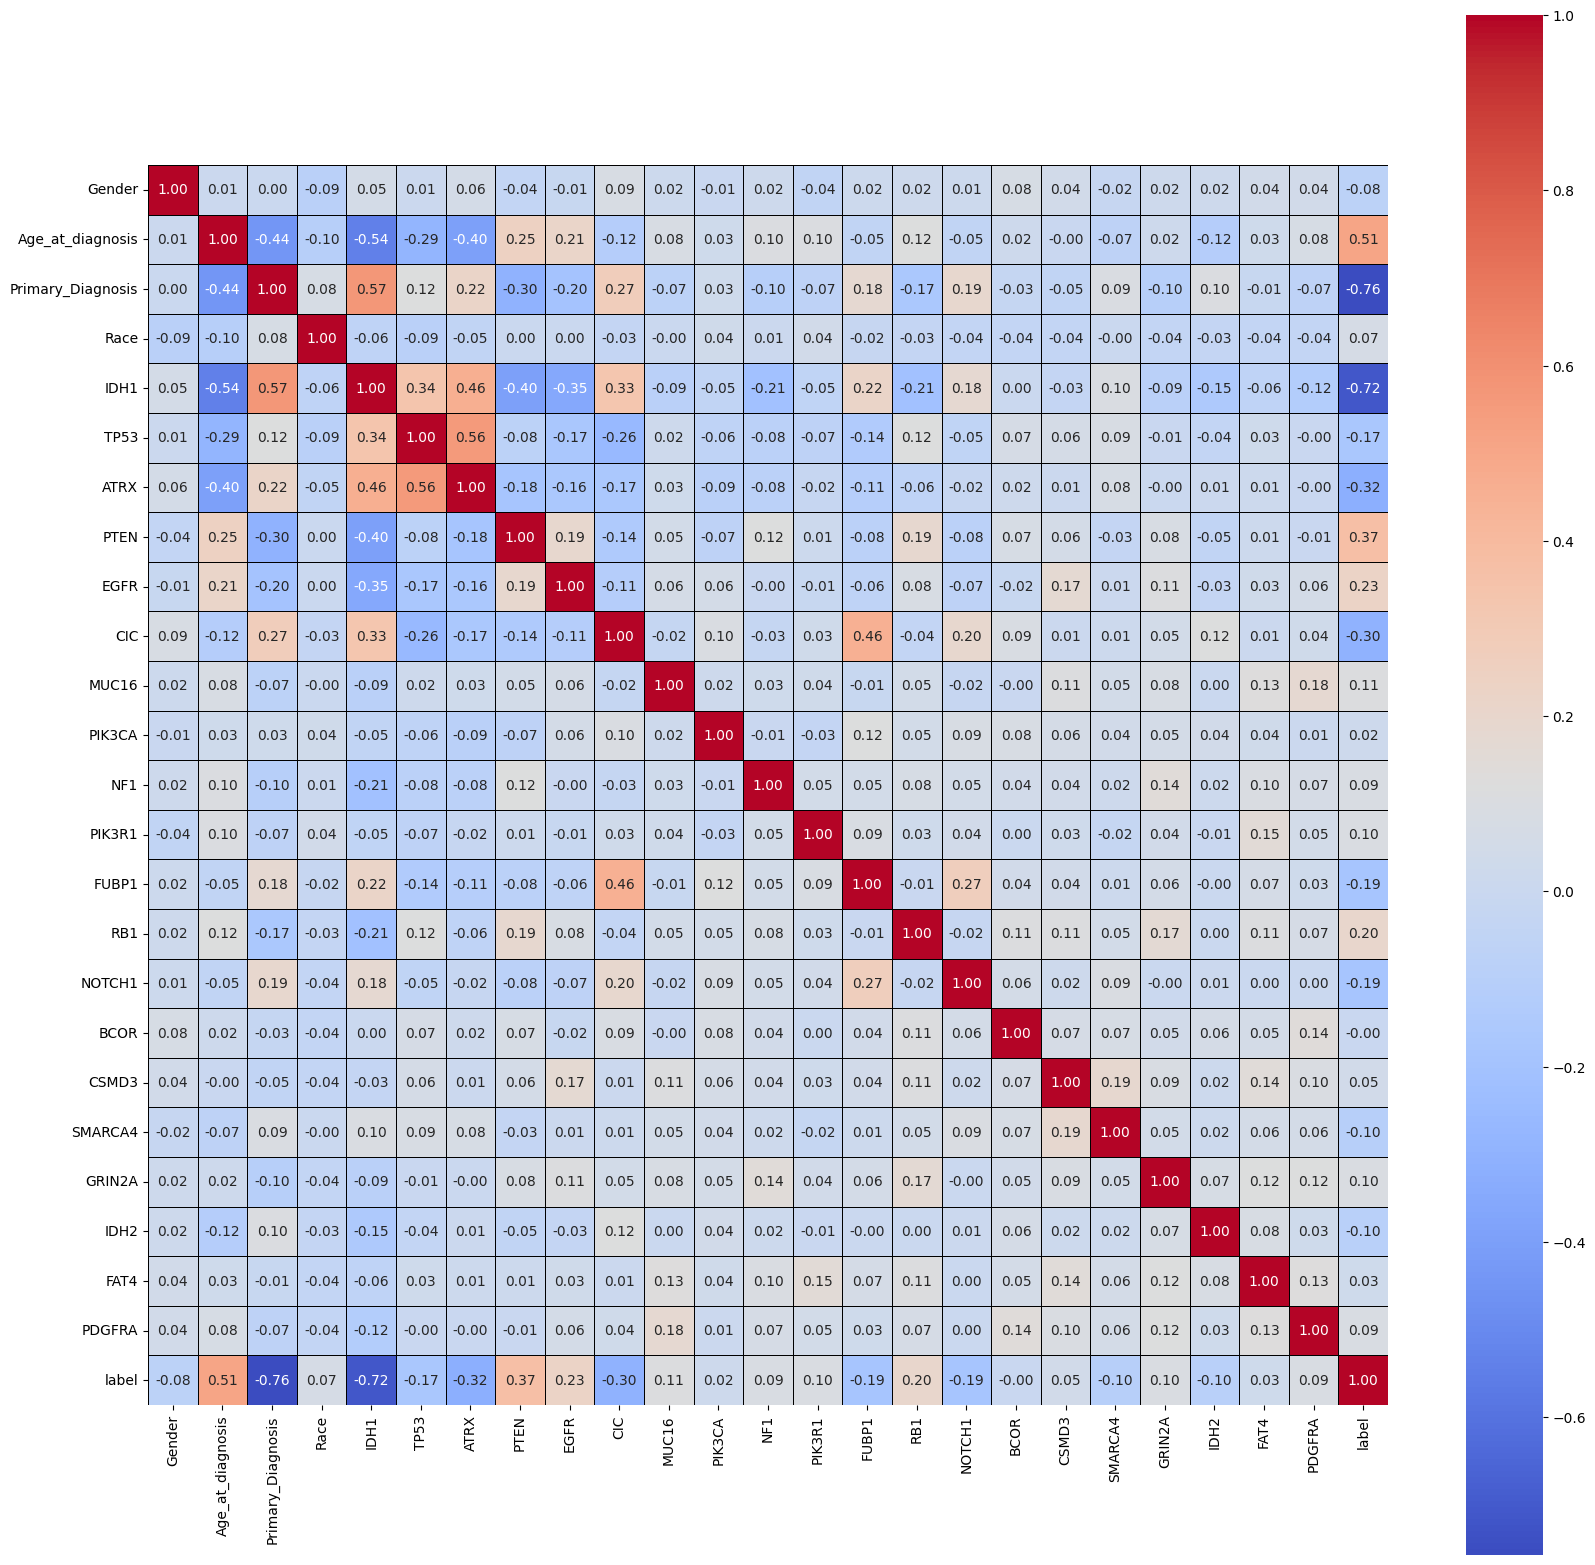

In [191]:
plt.figure(figsize=(20,20))
k = temp.corr()
sns.heatmap(k,cmap='coolwarm',annot=True, square=True, annot_kws={'size': 10}, linewidth=0.5, linecolor='black', fmt='.2f',cbar=True)

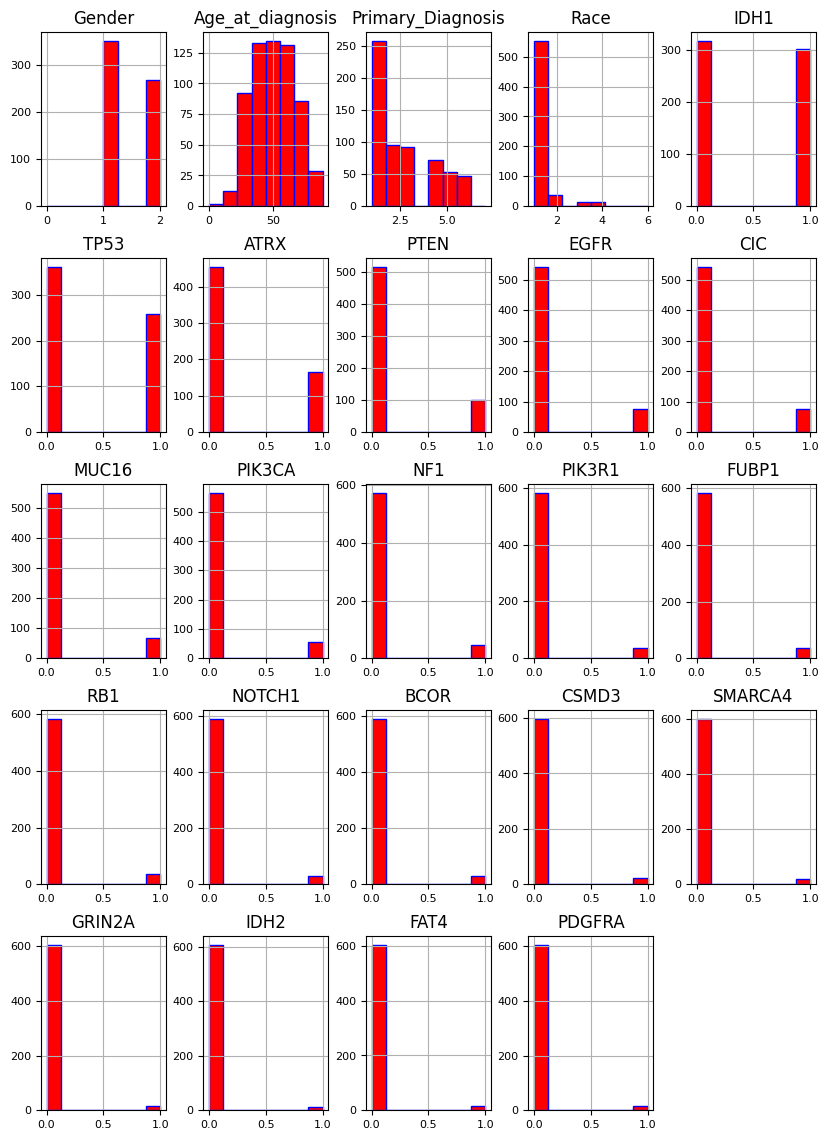

In [192]:
# plot all the columns in X_train
X_train.hist(bins=8, figsize=(10,14), color='red', edgecolor='blue', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=True)
plt.show()

In [193]:
# Logistic Regression

logreg = LogisticRegression(solver='liblinear',class_weight='balanced', penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.97


In [194]:
# Logistic Regression with Cross Validation

logreg = LogisticRegression(solver='liblinear',class_weight='balanced', penalty='l2')
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


[0.9516129  1.         1.         1.         0.98387097 0.98387097
 0.98387097 1.         1.         0.9516129 ]
0.9854838709677418


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.753 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.773 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.731 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.733 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l

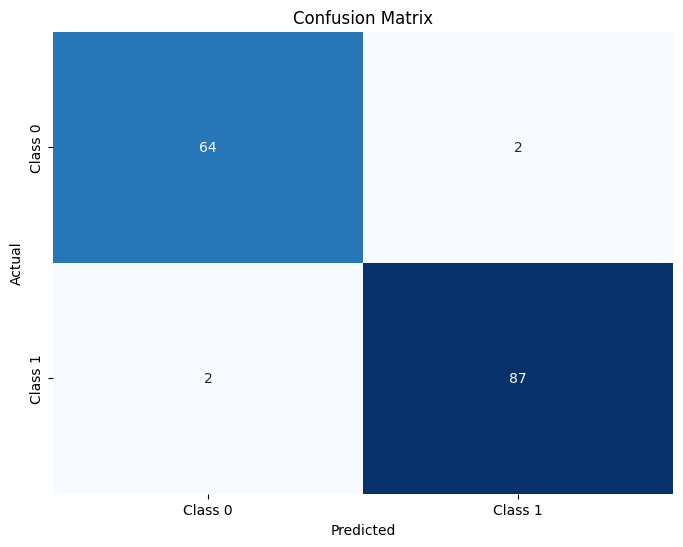

In [195]:
# Logistic Regression with Grid Search

from sklearn.metrics import classification_report, f1_score
lr=LogisticRegression(n_jobs=-1, random_state=22)

param_grid = {'C': [0.0001, 0.001, 0.01], 'penalty': ['l2'],'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}] }
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3, scoring='f1_macro', cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

f1_macro = f1_score(y_test, grid_predictions, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fitting 15 folds for each of 4 candidates, totalling 60 fits
[CV 1/15] END ..................n_estimators=50;, score=0.992 total time=   0.0s
[CV 2/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 3/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 6/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 7/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 8/15] END ..................n_estimators=50;, score=0.992 total time=   0.0s
[CV 9/15] END ..................n_estimators=50;, score=1.000 total time=   0.0s
[CV 10/15] END .................n_estimators=50;, score=1.000 total time=   0.0s
[CV 11/15] END .................n_estimators=50;, score=0.992 total time=   0.0s
[CV 12/15] END .................n_estimators=50;

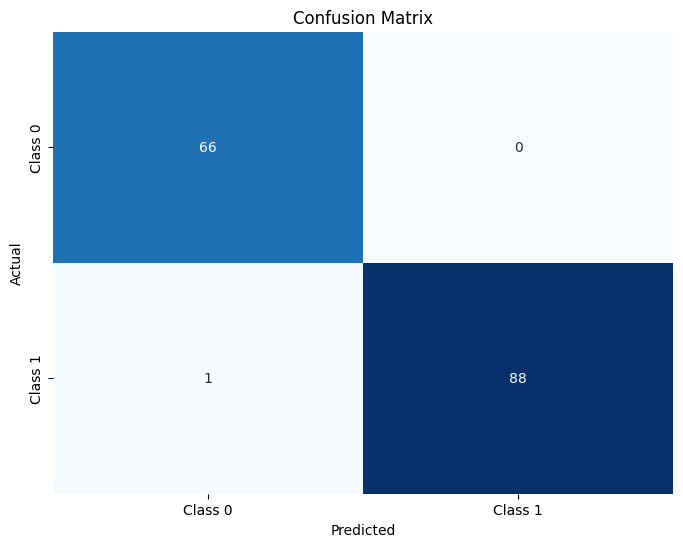

In [196]:
# AdaBoost Classifier 

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
params_ab = {'n_estimators': [50, 100, 150, 200]}
gs_ab = GridSearchCV(estimator=model, param_grid=params_ab, cv=cv_method, verbose=3, scoring='f1_macro')
gs_ab.fit(X_train,y_train)
gs_ab.best_params_
y_pred = gs_ab.predict(X_test)
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [197]:
# Decision Tree Classifier

dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy of Decision Tree Classifier on test set: 0.99


Fitting 15 folds for each of 9 candidates, totalling 135 fits
[CV 1/15] END ......................max_depth=1;, score=0.992 total time=   0.0s
[CV 2/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 3/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 4/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 5/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 6/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 7/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 8/15] END ......................max_depth=1;, score=0.992 total time=   0.0s
[CV 9/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 10/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 11/15] END .....................max_depth=1;, score=0.992 total time=   0.0s


[CV 12/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 13/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 14/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 15/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 1/15] END ......................max_depth=2;, score=0.992 total time=   0.0s
[CV 2/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 3/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 4/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 5/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 6/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 7/15] END ......................max_depth=2;, score=1.000 total time=   0.0s
[CV 8/15] END ......................max_depth=2;, score=0.992 total time=   0.0s
[CV 9/15] END .............

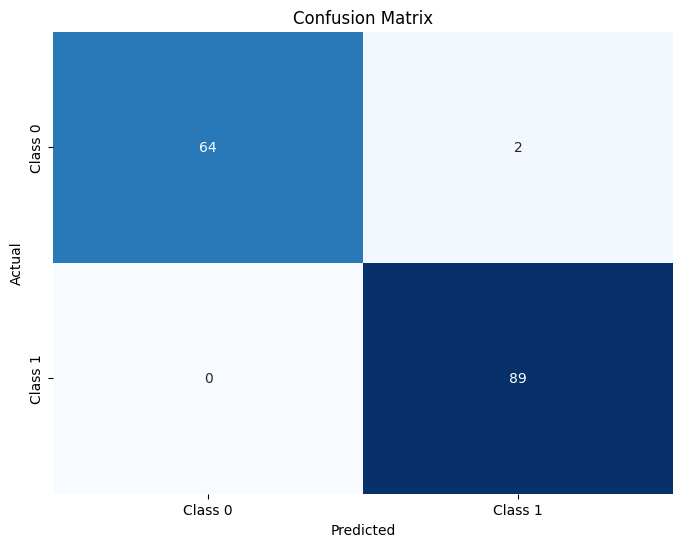

In [198]:
# Decision Tree Classifier with Grid Search CV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = DecisionTreeClassifier(random_state=40)
params_dt = {'max_depth': range(1, 10)}
gs_dt = GridSearchCV(estimator=model, param_grid=params_dt, cv=cv_method, verbose=3, scoring='f1_macro')
gs_dt.fit(X_train,y_train)
print("Best Parameters:", gs_dt.best_params_)
y_pred = gs_dt.predict(X_test)
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [199]:
# Naive Bayes Classifier

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))



Accuracy of Naive Bayes Classifier on test set: 0.86



	### Training Naive Bayes Classifier with GridSearchCV ### 

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV 1/15] END ................var_smoothing=1.0;, score=0.669 total time=   0.0s
[CV 2/15] END ................var_smoothing=1.0;, score=0.723 total time=   0.0s
[CV 3/15] END ................var_smoothing=1.0;, score=0.736 total time=   0.0s
[CV 4/15] END ................var_smoothing=1.0;, score=0.697 total time=   0.0s
[CV 5/15] END ................var_smoothing=1.0;, score=0.785 total time=   0.0s
[CV 6/15] END ................var_smoothing=1.0;, score=0.761 total time=   0.0s
[CV 7/15] END ................var_smoothing=1.0;, score=0.686 total time=   0.0s
[CV 8/15] END ................var_smoothing=1.0;, score=0.726 total time=   0.0s
[CV 9/15] END ................var_smoothing=1.0;, score=0.718 total time=   0.0s
[CV 10/15] END ...............var_smoothing=1.0;, score=0.731 total time=   0.0s
[CV 11/15] END ...............var_smoothing=1.0;, score=0.658 t

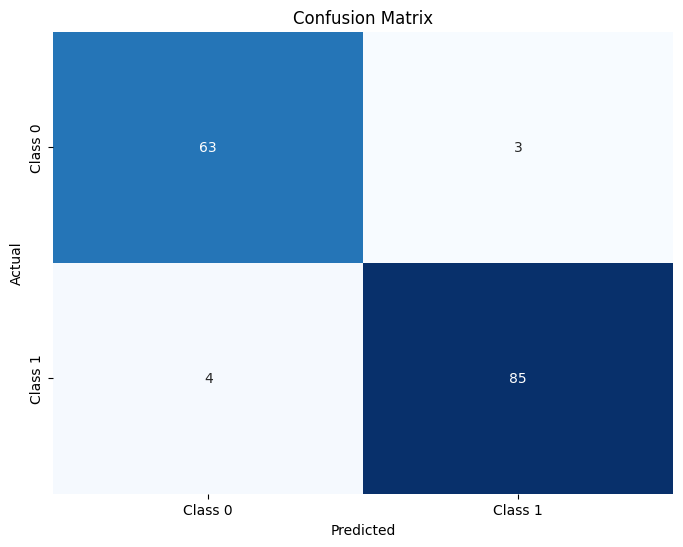

In [200]:
# 1.2.2 Navie Bayes With Tuning

print('\n\t### Training Naive Bayes Classifier with GridSearchCV ### \n')
from sklearn.naive_bayes import GaussianNB
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = GaussianNB()
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=3, scoring='f1_macro')
gs_NB.fit(X_train,y_train)
gs_NB.best_params_
y_pred = gs_NB.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 15 candidates, totalling 225 fits
[CV 1/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 2/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 3/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 4/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 5/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 6/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 7/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 8/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 9/15] END ...................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 10/15] END ..................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 11/15] END ..................C=0.1, gamma=1;, score=0.367 total time=   0.1s
[CV 12/15] END ..................C=0.1, gamma=

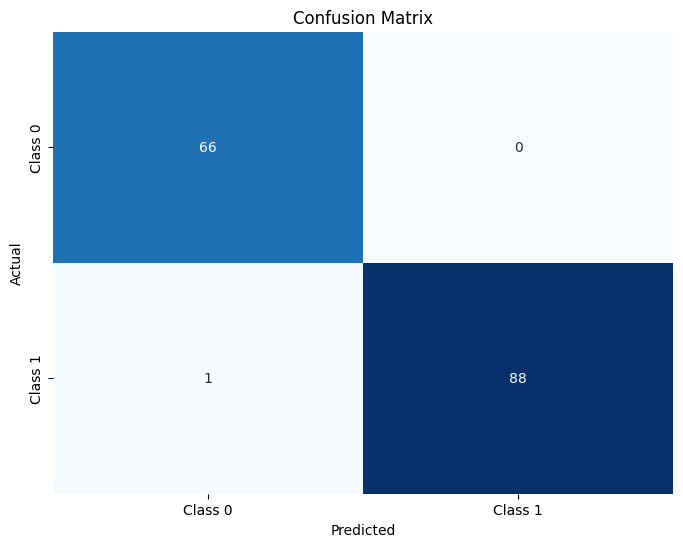

In [201]:
# svm with grid search cv
from sklearn import svm 

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = svm.SVC(class_weight='balanced',kernel='rbf',C=1,probability=True)
params_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01]}
gs_svm = GridSearchCV(estimator=model, param_grid=params_svm, cv=cv_method, verbose=3, scoring='f1_macro')
gs_svm.fit(X_train,y_train)
gs_svm.best_params_
y_pred = gs_svm.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)


# Save the predicted labels to a text file
output_file_path = 'RitikaJain_21223_labels.txt'
with open(output_file_path, 'w') as file:
    for label in y_pred:
        file.write(str(label) + '\n')  # Convert label to string before concatenating

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 36 candidates, totalling 540 fits
[CV 1/15] END .....max_depth=1, n_estimators=50;, score=0.958 total time=   0.0s


[CV 2/15] END .....max_depth=1, n_estimators=50;, score=0.901 total time=   0.1s
[CV 3/15] END .....max_depth=1, n_estimators=50;, score=0.877 total time=   0.0s
[CV 4/15] END .....max_depth=1, n_estimators=50;, score=0.959 total time=   0.0s
[CV 5/15] END .....max_depth=1, n_estimators=50;, score=0.942 total time=   0.0s
[CV 6/15] END .....max_depth=1, n_estimators=50;, score=0.951 total time=   0.0s
[CV 7/15] END .....max_depth=1, n_estimators=50;, score=0.891 total time=   0.0s
[CV 8/15] END .....max_depth=1, n_estimators=50;, score=0.926 total time=   0.0s
[CV 9/15] END .....max_depth=1, n_estimators=50;, score=0.984 total time=   0.0s
[CV 10/15] END ....max_depth=1, n_estimators=50;, score=0.926 total time=   0.0s
[CV 11/15] END ....max_depth=1, n_estimators=50;, score=0.951 total time=   0.0s
[CV 12/15] END ....max_depth=1, n_estimators=50;, score=0.891 total time=   0.0s
[CV 13/15] END ....max_depth=1, n_estimators=50;, score=0.967 total time=   0.0s
[CV 14/15] END ....max_depth

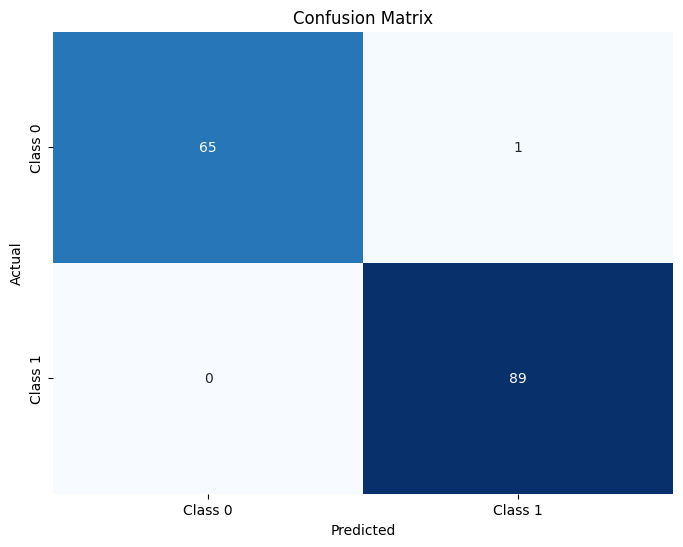

In [202]:
# Random Forest Classifier

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = RandomForestClassifier(max_features=3,class_weight='balanced')
params_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': range(1, 10)}
gs_rf = GridSearchCV(estimator=model, param_grid=params_rf, cv=cv_method, verbose=3, scoring='f1_macro')
gs_rf.fit(X_train,y_train)
gs_rf.best_params_
y_pred = gs_rf.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[CV 1/15] END ....................n_neighbors=1;, score=0.942 total time=   0.0s
[CV 2/15] END ....................n_neighbors=1;, score=0.959 total time=   0.0s
[CV 3/15] END ....................n_neighbors=1;, score=0.958 total time=   0.0s
[CV 4/15] END ....................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 5/15] END ....................n_neighbors=1;, score=0.926 total time=   0.0s
[CV 6/15] END ....................n_neighbors=1;, score=0.983 total time=   0.0s
[CV 7/15] END ....................n_neighbors=1;, score=0.909 total time=   0.0s
[CV 8/15] END ....................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 9/15] END ....................n_neighbors=1;, score=0.950 total time=   0.0s
[CV 10/15] END ...................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 11/15] END ...................n_neighbors=1;, score=0.942 total time=   0.0s
[CV 12/15] END ...................n_neighbors=1;

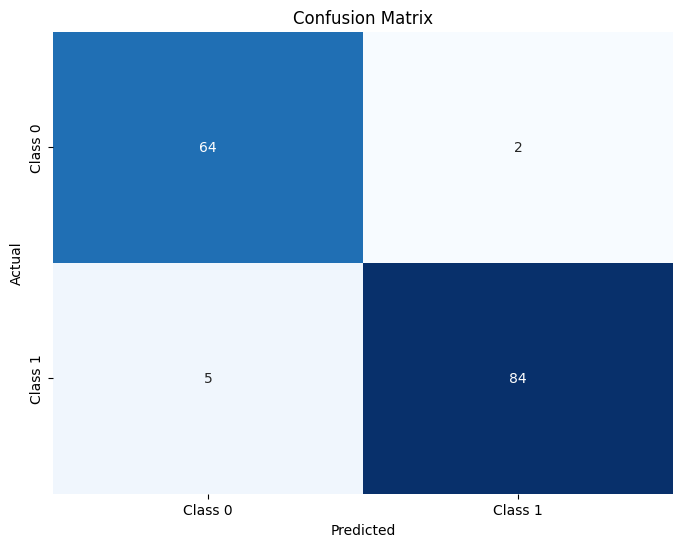

In [203]:
# KNN Classifier

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = KNeighborsClassifier()
params_knn = {'n_neighbors': range(1, 2)}
gs_knn = GridSearchCV(estimator=model, param_grid=params_knn, cv=cv_method, verbose=3, scoring='f1_macro')

# Convert input data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

gs_knn.fit(X_train,y_train)
gs_knn.best_params_
y_pred = gs_knn.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Based on the correlation plot and feature importance analysis plot, we will select 4 features Primary_diagnosis, IDH1, Age_diagnosis, PTEN.

2 features primary_diagnosis and IDH1 can also be choosen

In [204]:
X_train = train_data

#-------------------------------------------------------------------------------------#
X_train = X_train.replace('--', 0)
#-------------------------------------------------------------------------------------#

#########################################################################################################################################
# If I only use these 4 features then also i get very high accuracy.
X_train2 = X_train[['Primary_Diagnosis','IDH1', 'Age_at_diagnosis','PTEN']] 
# X_train2 =X_train
y_train2 = train_labels['label']
print(X_train2.head)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train2, y_train2, test_size=0.2, random_state=22)


<bound method NDFrame.head of      Primary_Diagnosis  IDH1  Age_at_diagnosis  PTEN
0                    1     0                37     0
1                    2     1                25     0
2                    1     0                63     0
3                    2     1                69     0
4                    3     1                43     0
..                 ...   ...               ...   ...
770                  1     0                58     0
771                  4     0                63     0
772                  1     0                64     0
773                  1     1                44     0
774                  1     0                60     1

[775 rows x 4 columns]>


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.753 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.728 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.736 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=None, penalty=l2;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.773 total time=   0.0s


[CV 3/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.731 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight=balanced, penalty=l2;, score=0.733 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l2;, score=0.758 total time=   0.0s
[CV 2/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l2;, score=0.758 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l2;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l2;, score=0.725 total time=   0.0s
[CV 5/5] END C=0.0001, class_weight={0: 1, 1: 2}, penalty=l2;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.0001, class_weight={0: 1, 1: 5}, penalty=l2;, score=0.507 total time=   0.1s
[CV 2/5] END C=0.0001, class_weight={0: 1, 1: 5}, penalty=l2;, score=0.565 total time=   0.0s
[CV 3/5] END C=0.0001, class_weight={0: 1, 1: 5}, penalty=l2;, score=0.5

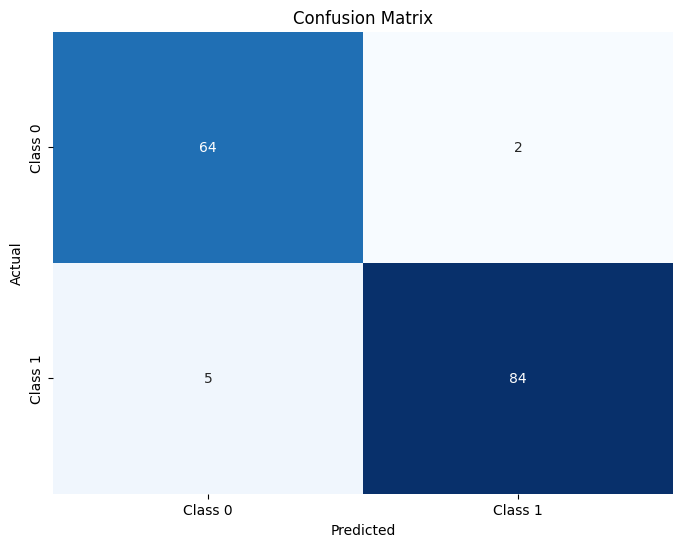

In [205]:
# Logistic Regression with Grid Search

from sklearn.metrics import classification_report, f1_score
lr=LogisticRegression(n_jobs=-1, random_state=22)

param_grid = {'C': [0.0001, 0.001, 0.01], 'penalty': ['l2'],'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}] }
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3, scoring='f1_macro', cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

f1_macro = f1_score(y_test, grid_predictions, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 4 candidates, totalling 60 fits
[CV 1/15] END ..................n_estimators=50;, score=0.992 total time=   0.0s
[CV 2/15] END ..................n_estimators=50;, score=0.992 total time=   0.1s
[CV 3/15] END ..................n_estimators=50;, score=1.000 total time=   0.1s
[CV 4/15] END ..................n_estimators=50;, score=1.000 total time=   0.1s
[CV 5/15] END ..................n_estimators=50;, score=1.000 total time=   0.2s
[CV 6/15] END ..................n_estimators=50;, score=1.000 total time=   0.1s
[CV 7/15] END ..................n_estimators=50;, score=1.000 total time=   0.1s
[CV 8/15] END ..................n_estimators=50;, score=0.992 total time=   0.0s
[CV 9/15] END ..................n_estimators=50;, score=1.000 total time=   0.1s
[CV 10/15] END .................n_estimators=50;, score=0.992 total time=   0.1s
[CV 11/15] END .................n_estimators=50;, score=0.992 total time=   0.0s
[CV 12/15] END .................n_estimators=50;

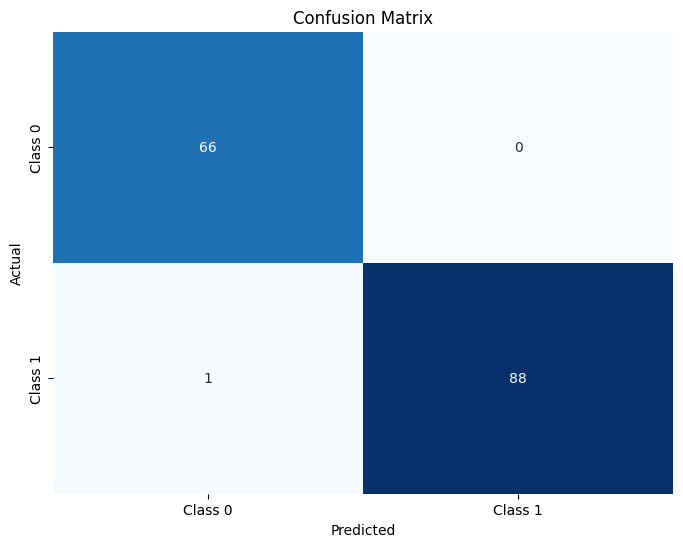

In [206]:
# AdaBoost Classifier with feature selection

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
params_ab = {'n_estimators': [50, 100, 150, 200]}
gs_ab = GridSearchCV(estimator=model, param_grid=params_ab, cv=cv_method, verbose=3, scoring='accuracy')
gs_ab.fit(X_train,y_train)
gs_ab.best_params_
y_pred = gs_ab.predict(X_test)
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 9 candidates, totalling 135 fits
[CV 1/15] END ......................max_depth=1;, score=0.992 total time=   0.0s
[CV 2/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 3/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 4/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 5/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 6/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 7/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 8/15] END ......................max_depth=1;, score=0.992 total time=   0.0s
[CV 9/15] END ......................max_depth=1;, score=1.000 total time=   0.0s
[CV 10/15] END .....................max_depth=1;, score=1.000 total time=   0.0s
[CV 11/15] END .....................max_depth=1;, score=0.992 total time=   0.0s
[CV 12/15] END .....................max_depth=1

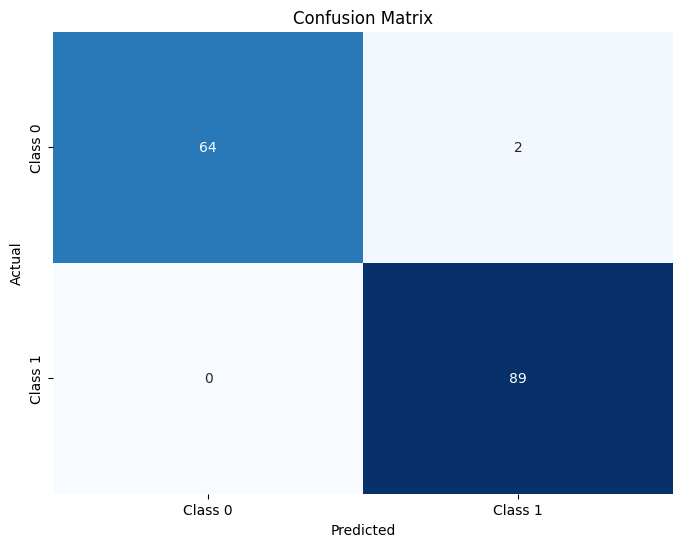

In [207]:
# Decision Tree Classifier with Grid Search CV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = DecisionTreeClassifier(random_state=40)
params_dt = {'max_depth': range(1, 10)}
gs_dt = GridSearchCV(estimator=model, param_grid=params_dt, cv=cv_method, verbose=3, scoring='f1_macro')
gs_dt.fit(X_train,y_train)
print("Best Parameters:", gs_dt.best_params_)
y_pred = gs_dt.predict(X_test)
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


	### Training Naive Bayes Classifier with GridSearchCV ### 

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV 1/15] END ................var_smoothing=1.0;, score=0.669 total time=   0.0s
[CV 2/15] END ................var_smoothing=1.0;, score=0.723 total time=   0.0s
[CV 3/15] END ................var_smoothing=1.0;, score=0.736 total time=   0.0s
[CV 4/15] END ................var_smoothing=1.0;, score=0.697 total time=   0.0s
[CV 5/15] END ................var_smoothing=1.0;, score=0.785 total time=   0.0s
[CV 6/15] END ................var_smoothing=1.0;, score=0.761 total time=   0.0s
[CV 7/15] END ................var_smoothing=1.0;, score=0.686 total time=   0.0s
[CV 8/15] END ................var_smoothing=1.0;, score=0.726 total time=   0.0s
[CV 9/15] END ................var_smoothing=1.0;, score=0.718 total time=   0.0s
[CV 10/15] END ...............var_smoothing=1.0;, score=0.731 total time=   0.0s
[CV 11/15] END ...............var_smoothing=1.0;, score=0.658 t

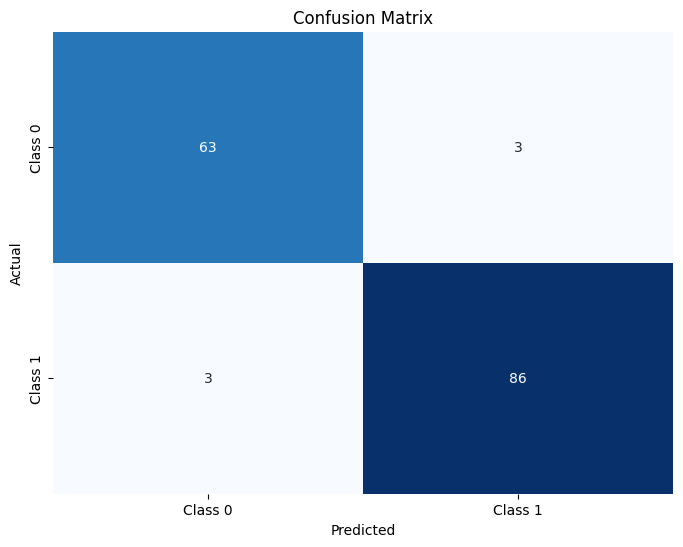

In [208]:
# 1.2.2 Navie Bayes With Tuning

print('\n\t### Training Naive Bayes Classifier with GridSearchCV ### \n')
from sklearn.naive_bayes import GaussianNB
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = GaussianNB()
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=3, scoring='f1_macro')
gs_NB.fit(X_train,y_train)
gs_NB.best_params_
y_pred = gs_NB.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 15 candidates, totalling 225 fits
[CV 1/15] END ...................C=0.1, gamma=1;, score=0.914 total time=   0.0s
[CV 2/15] END ...................C=0.1, gamma=1;, score=0.923 total time=   0.0s
[CV 3/15] END ...................C=0.1, gamma=1;, score=0.880 total time=   0.0s
[CV 4/15] END ...................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/15] END ...................C=0.1, gamma=1;, score=0.887 total time=   0.0s
[CV 6/15] END ...................C=0.1, gamma=1;, score=0.879 total time=   0.0s
[CV 7/15] END ...................C=0.1, gamma=1;, score=0.869 total time=   0.0s
[CV 8/15] END ...................C=0.1, gamma=1;, score=0.914 total time=   0.0s
[CV 9/15] END ...................C=0.1, gamma=1;, score=0.896 total time=   0.0s
[CV 10/15] END ..................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 11/15] END ..................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 12/15] END ..................C=0.1, gamma=

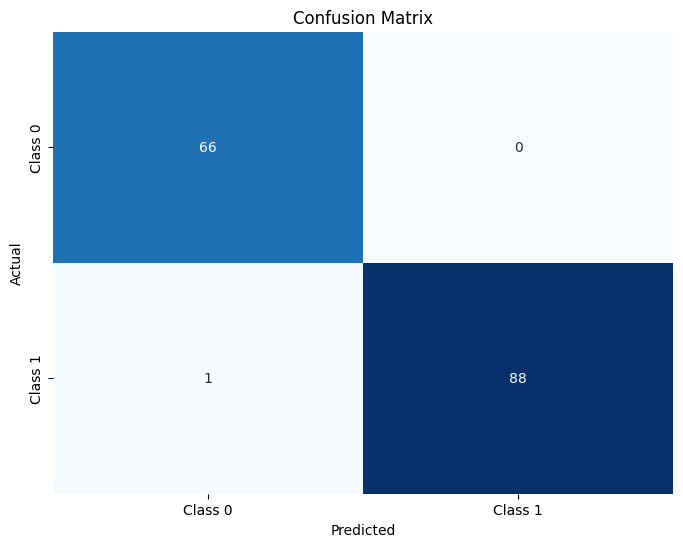

In [209]:
# svm with grid search cv
from sklearn import svm 

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = svm.SVC(class_weight='balanced',kernel='rbf',C=1,probability=True)
params_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01]}
gs_svm = GridSearchCV(estimator=model, param_grid=params_svm, cv=cv_method, verbose=3, scoring='f1_macro')
gs_svm.fit(X_train,y_train)
gs_svm.best_params_
y_pred = gs_svm.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# Save the predicted labels to a text file
output_file_path = 'RitikaJain_21223_4feature_labels.txt'
with open(output_file_path, 'w') as file:
    for label in y_pred:
        file.write(str(label) + '\n')  # Convert label to string before concatenating

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 36 candidates, totalling 540 fits
[CV 1/15] END .....max_depth=1, n_estimators=50;, score=0.992 total time=   0.1s
[CV 2/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 3/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 6/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 7/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.0s
[CV 8/15] END .....max_depth=1, n_estimators=50;, score=0.992 total time=   0.1s
[CV 9/15] END .....max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 10/15] END ....max_depth=1, n_estimators=50;, score=1.000 total time=   0.0s
[CV 11/15] END ....max_depth=1, n_estimators=50;, score=0.992 total time=   0.0s
[CV 12/15] END ....max_depth=1, n_estimators=5

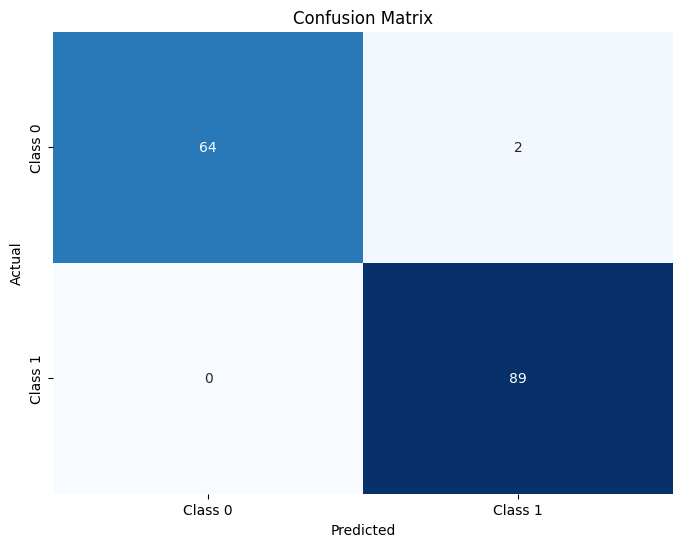

In [210]:
# Random Forest Classifier

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = RandomForestClassifier(max_features=3,class_weight='balanced')
params_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': range(1, 10)}
gs_rf = GridSearchCV(estimator=model, param_grid=params_rf, cv=cv_method, verbose=3, scoring='f1_macro')
gs_rf.fit(X_train,y_train)
gs_rf.best_params_
y_pred = gs_rf.predict(X_test)
print(classification_report(y_test, y_pred))


f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 15 folds for each of 1 candidates, totalling 15 fits
[CV 1/15] END ....................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 2/15] END ....................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 3/15] END ....................n_neighbors=1;, score=0.992 total time=   0.0s
[CV 4/15] END ....................n_neighbors=1;, score=0.983 total time=   0.0s
[CV 5/15] END ....................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 6/15] END ....................n_neighbors=1;, score=0.984 total time=   0.0s
[CV 7/15] END ....................n_neighbors=1;, score=0.983 total time=   0.0s
[CV 8/15] END ....................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 9/15] END ....................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 10/15] END ...................n_neighbors=1;, score=0.975 total time=   0.0s
[CV 11/15] END ...................n_neighbors=1;, score=0.959 total time=   0.0s
[CV 12/15] END ...................n_neighbors=1;

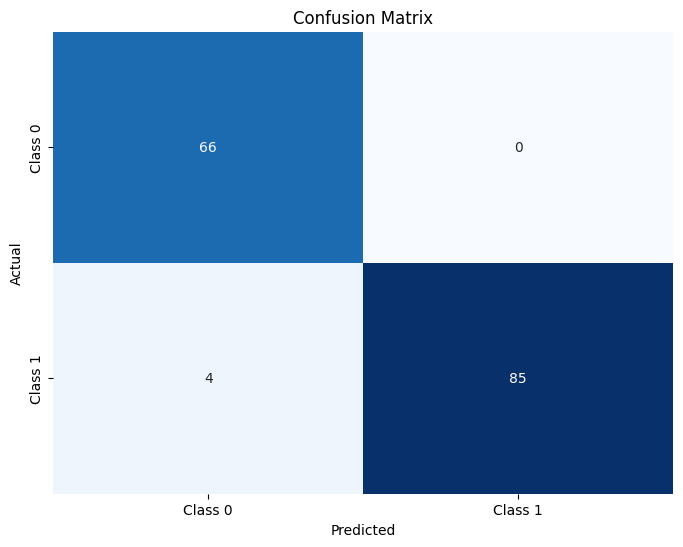

In [211]:
# KNN Classifier

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = KNeighborsClassifier()
params_knn = {'n_neighbors': range(1, 2)}
gs_knn = GridSearchCV(estimator=model, param_grid=params_knn, cv=cv_method, verbose=3, scoring='f1_macro')

# Convert input data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

gs_knn.fit(X_train,y_train)
gs_knn.best_params_
y_pred = gs_knn.predict(X_test)


# Print classification report
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1-macro score on the test set:', f1_macro)

# # Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
# print(cnf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()